In [139]:
from sklearn.datasets import load_wine
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import time
import matplotlib.pyplot as plt
import numpy as np
import tabulate
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [140]:
wine_dataset = load_wine()
wine_feature_names = wine_dataset.feature_names
wine_data = wine_dataset.data
wine_target = wine_dataset.target
wine_target_names = wine_dataset.target_names

In [141]:
# fh = open("./classPractice_Wines_Description.txt", "a")
# fh.write(wine_dataset.DESCR)
# fh.close()

In [142]:
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [143]:
def get_datos():
    wine_dataset = load_wine()

    wine_feature_names = wine_dataset.feature_names
    wine_data = wine_dataset.data
    wine_target = wine_dataset.target
    wine_target_names = wine_dataset.target_names

    x = wine_data
    data_min = 0
    data_max = x.max(axis=0)
    x = (x - data_min) / (data_max - data_min)

    y = wine_target
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(max(y) + 1))
    y = label_binarizer.transform(y)

    return x, y

In [144]:
def compile_fit(layers_epochs, x_train, y_train, x_test, y_test):
    tf.keras.utils.set_random_seed(2055)

    layers = layers_epochs[0]
    epochs = layers_epochs[1]

    model = Sequential()

    for idx, layer in enumerate(layers):
        if idx == 0:
            model.add(Dense(layer, activation='relu', input_dim=x_train.shape[1]))
        elif idx == (len(layers) - 1):
            model.add(Dense(layer, activation='softmax'))
        else:
            model.add(Dense(layer, activation='relu'))

    model.compile(loss='categorical_crossentropy')

    timestamp_before = time.time_ns()
    model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=False)
    timestamp_after = time.time_ns()

    return {
        "model": model,
        "elapsed_time": (timestamp_after - timestamp_before) / 1_000_000_000,
        "history": model_history
    }

In [145]:
X, y = get_datos()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2055, shuffle=True)

In [146]:
X

array([[0.95954147, 0.29482759, 0.75232198, ..., 0.60818713, 0.98      ,
        0.63392857],
       [0.89008766, 0.30689655, 0.6625387 , ..., 0.61403509, 0.85      ,
        0.625     ],
       [0.88739042, 0.40689655, 0.82662539, ..., 0.60233918, 0.7925    ,
        0.70535714],
       ...,
       [0.89480782, 0.73793103, 0.6996904 , ..., 0.34502924, 0.39      ,
        0.49702381],
       [0.88806473, 0.44655172, 0.73374613, ..., 0.35087719, 0.405     ,
        0.5       ],
       [0.95279838, 0.70689655, 0.84829721, ..., 0.35672515, 0.4       ,
        0.33333333]])

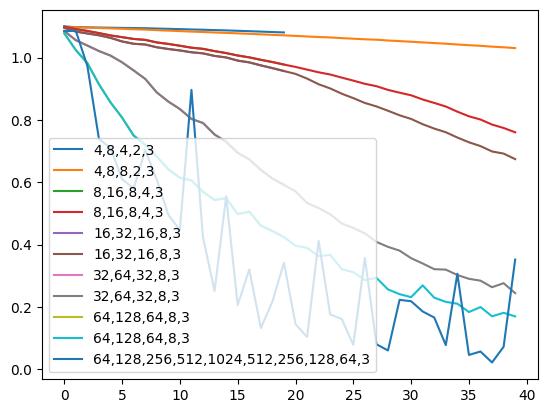

In [147]:
results = []

neuronal_nets = [
    [[4, 8, 4, 2, 3], 20],
    [[4, 8, 8, 2, 3], 40],
    [[8, 16, 8, 4, 3], 20],
    [[8, 16, 8, 4, 3], 40],
    [[16, 32, 16, 8, 3], 20],
    [[16, 32, 16, 8, 3], 40],
    [[32, 64, 32, 8, 3], 20],
    [[32, 64, 32, 8, 3], 40],
    [[64, 128, 64, 8, 3], 20],
    [[64, 128, 64, 8, 3], 40],
    [[64, 128, 256, 512, 1024, 512, 256, 128, 64, 3], 40],
]

for net in neuronal_nets:
    model_performance = compile_fit(net, X_train, y_train, X_test, y_test)
    model = model_performance["model"]
    time_taken = model_performance["elapsed_time"]
    history = model_performance["history"]

    indexed_result = [
        (','.join(map(str, net[0]))),
        net[1],
        history.history['loss'][0],
        history.history['loss'][len(history.history['loss']) // 2],
        history.history['loss'][-1],
        round(time_taken, 2)
    ]

    results.append(indexed_result)
    plt.plot(range(len(history.history['loss'])), history.history['loss'], label=(','.join(map(str, net[0]))))
    plt.legend()

plt.show()

In [148]:
print(tabulate.tabulate(results, headers=["Red", "Epocas", "loss Principio", "loss Mitad", "loss Final", "Tiempo (s)"]))

Red                                     Epocas    loss Principio    loss Mitad    loss Final    Tiempo (s)
------------------------------------  --------  ----------------  ------------  ------------  ------------
4,8,4,2,3                                   20           1.09961      1.09105       1.08048           0.85
4,8,8,2,3                                   40           1.09841      1.06942       1.03018           1.33
8,16,8,4,3                                  20           1.09917      1.03778       0.977426          0.88
8,16,8,4,3                                  40           1.09917      0.969818      0.760061          1.28
16,32,16,8,3                                20           1.09518      1.02267       0.956634          0.83
16,32,16,8,3                                40           1.09518      0.94746       0.673973          1.22
32,64,32,8,3                                20           1.08511      0.83465       0.591547          0.82
32,64,32,8,3                         